In [1]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.interpolate import interp1d
from scipy.signal import correlate

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter
#import statsmodels
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Libraries for text preprocessing and analysis
import re,nltk,spacy,string
nlp=spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
#from scipy.signal._signaltools import _centered
from scipy.signal.signaltools import _centered
# Libraries for model evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from statsmodels.compat.numpy import lstsq
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# row/column display limit
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df_review = pd.read_csv('sample30.csv')
print('Shape of dataset- ',df_review.shape)
df_review.head(5)

Shape of dataset-  (30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [3]:
#print the information of dataframe to check their data types.
df_review.info()
print(df_review.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [4]:
#print the shape of the Dataframe
df_review.shape

(30000, 15)

In [5]:
#describe the data frame
df_review.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
# Find missing values/ % of null values percentage in the data set
null_values_per_column = (100*round((df_review.isnull().sum())/len(df_review),2)).sort_values(ascending=False)
print("% of null values per column:")
print(null_values_per_column)

% of null values per column:
reviews_userProvince    99.0
reviews_userCity        94.0
reviews_didPurchase     47.0
reviews_doRecommend      9.0
reviews_title            1.0
user_sentiment           0.0
reviews_username         0.0
reviews_text             0.0
reviews_rating           0.0
reviews_date             0.0
name                     0.0
manufacturer             0.0
categories               0.0
brand                    0.0
id                       0.0
dtype: float64


In [7]:
#create a new columns 'reviews' by merging the reviews_text and reviews_title columns
df_review['reviews'] = df_review['reviews_title']+ " "+df_review['reviews_text']


In [8]:
#Drop the existing reviews_text and reviews_title columns
df_review.drop(['reviews_text', 'reviews_title'], axis =1 ,inplace = True)

In [9]:
df_review.duplicated().sum()

4

In [10]:
df_review = df_review.drop_duplicates()

In [11]:
df_review.duplicated().sum()

0

In [12]:
#Create a clean dataframe
df_clean_review = df_review[['name','reviews_username','reviews_rating','user_sentiment','reviews']]

In [13]:
df_clean_review.head()

,name,reviews_username,reviews_rating,user_sentiment,reviews
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,Positive,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,Positive,Good Good flavor. This review was collected as part of a promotion.
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,Positive,Good Good flavor.
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,Negative,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess."
4,K-Y Love Sensuality Pleasure Gel,walker557,1,Negative,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


In [14]:
#ccheck the columns, non-null count, datatype of each column
df_clean_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29996 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29996 non-null  object
 1   reviews_username  29933 non-null  object
 2   reviews_rating    29996 non-null  int64 
 3   user_sentiment    29995 non-null  object
 4   reviews           29810 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
df_clean_review.shape

(29996, 5)

In [16]:
#describe the data frame
df_clean_review.describe()

,reviews_rating
count,29996.000000
mean,4.483131
std,0.988456
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
# Find missing values/ % of null values percentage in the data set
null_values_per_column = (100*round((df_clean_review.isnull().sum())/len(df_review),2)).sort_values(ascending=False)
print("% of null values per column:")
print(null_values_per_column)

% of null values per column:
reviews             1.0
user_sentiment      0.0
reviews_rating      0.0
reviews_username    0.0
name                0.0
dtype: float64


In [18]:
df_clean_review.dropna(inplace= True)

In [19]:
#map postivie sentiment as '1' and negative sentiment as '0'
df_clean_review['user_sentiment']=df_clean_review['user_sentiment'].replace({'Positive' :1, "Negative" : 0})

In [20]:
#Typecasting from float to int datatype
df_clean_review ['user_sentiment'] = df_clean_review['user_sentiment'].astype('int64')

In [21]:
df_clean_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29747 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29747 non-null  object
 1   reviews_username  29747 non-null  object
 2   reviews_rating    29747 non-null  int64 
 3   user_sentiment    29747 non-null  int64 
 4   reviews           29747 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [22]:
df_clean_review.reviews_rating.value_counts()

5    20653
4     5992
1     1361
3     1332
2      409
Name: reviews_rating, dtype: int64

In [23]:
df_clean_review.isna().sum()

name                0
reviews_username    0
reviews_rating      0
user_sentiment      0
reviews             0
dtype: int64

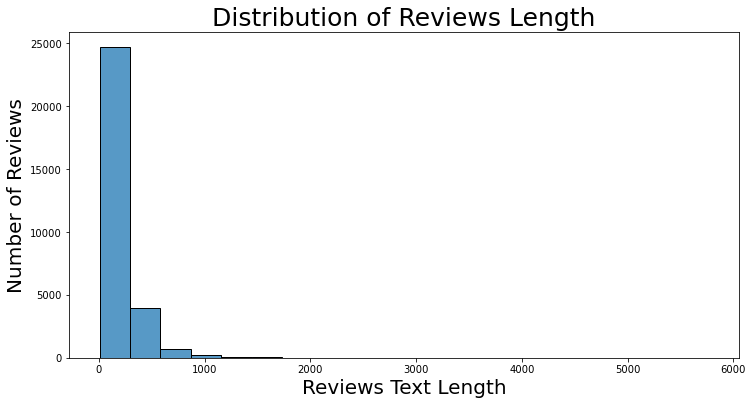

In [24]:
#Grapsh for the review_ratings Vs Length of the processed_reviews
import seaborn as sns
text_len = [len(text) for text in df_clean_review['reviews']]

plt.figure(figsize=[12,6])
sns.histplot(data=text_len,bins=20)
plt.title('Distribution of Reviews Length', fontsize = 25)
plt.xlabel('Reviews Text Length', size = 20)
plt.ylabel('Number of Reviews',size=20)
plt.show()

In [25]:
#Common functions for cleaning the text data 
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    """Remove the special Characters"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stopwords.words('english')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\geddamsg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
def normalize_and_lemmaize(input_text):
    input_text = remove_special_characters(input_text)
    words = nltk.word_tokenize(input_text)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [27]:
# Add a column for lemmatized review to the dataframe
df_clean_review["final_review"] =  df_clean_review.apply(lambda x: normalize_and_lemmaize(x['reviews']), axis=1)
#final_review = lemmatized review

In [28]:
df_clean_review.head()

,name,reviews_username,reviews_rating,user_sentiment,reviews,final_review
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5,1,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,awesome love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,1,Good Good flavor. This review was collected as part of a promotion.,good good flavor review collect part promotion
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5,1,Good Good flavor.,good good flavor
3,K-Y Love Sensuality Pleasure Gel,rebecca,1,0,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",disappoint read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,K-Y Love Sensuality Pleasure Gel,walker557,1,0,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,irritation husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


In [29]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [30]:
# Train and Test Divide
x_train,x_test,y_train,y_test = train_test_split(df_clean_review['final_review'],df_clean_review['user_sentiment'],train_size=0.75,random_state=45,stratify=df_clean_review['user_sentiment'])
y_train.value_counts()

# review_new_df = df_clean_review in my sheet
#lemmatized review = final_review in my sheet

1    19809
0     2501
Name: user_sentiment, dtype: int64

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)


tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)
x_train_transformed.shape

(22310, 15374)

In [32]:
# #creating the pickle for countvectorizer and TFIDF Transformer
import pickle
pickle.dump(count_vect,open("./Pickle/count_vector.pkl","wb"))



In [33]:
pickle.dump(tfidf_transformer,open("./Pickle/tfidf_transformer.pkl","wb"))

In [34]:
count = Counter(y_train)
print('Before sampling :',count)

sampler = SMOTE()

x_train_sm,y_train_sm = sampler.fit_resample(x_train_transformed,y_train)

count = Counter(y_train_sm)
print('After sampling :',count)

Before sampling : Counter({1: 19809, 0: 2501})
After sampling : Counter({1: 19809, 0: 19809})


In [35]:
#importing libraries 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
%matplotlib inline



from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

In [36]:
# Function for Metrics
performance=[]

def model_metrics(y,y_pred,model_name,metrics):
  Accuracy = accuracy_score(y,y_pred)
  roc = roc_auc_score(y,y_pred)
  confusion = confusion_matrix(y,y_pred)
  precision = precision_score(y,y_pred)
  f1 = f1_score(y,y_pred)
  TP = confusion[1,1]  # true positive
  TN = confusion[0,0]  # true negatives
  FP = confusion[0,1]  # false positives
  FN = confusion[1,0]  # false negatives
  sensitivity= TP / float(TP+FN)
  specificity = TN / float(TN+FP)

  print("*"*50)
  print('Confusion Matrix =')
  print(confusion)
  print("sensitivity of the %s = %f" % (model_name,round(sensitivity,2)))
  print("specificity of the %s = %f" % (model_name,round(specificity,2)))
  print("Accuracy Score of %s = %f" % (model_name,Accuracy))
  print('ROC AUC score of %s = %f' % (model_name,roc))
  print("Report=",)
  print(classification_report(y,y_pred))
  print("*"*50)
  metrics.append(dict({'Model_name':model_name,
                       'Accuracy':Accuracy,
                       'Roc_auc_score':roc,
                       'Precision':precision,
                       'F1_score':f1}))
  return metrics



In [37]:
# 1. Logsitic Regression 
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train_sm,y_train_sm)


LogisticRegression(solver='liblinear')

In [38]:
#importing libraries 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
%matplotlib inline



from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

## Logistic Regression

In [39]:
y_pred = lr.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred,'Logistic Regression',performance)

**************************************************
Confusion Matrix =
[[19042   767]
 [ 2014 17795]]
sensitivity of the Logistic Regression = 0.900000
specificity of the Logistic Regression = 0.960000
Accuracy Score of Logistic Regression = 0.929805
ROC AUC score of Logistic Regression = 0.929805
Report=
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     19809
           1       0.96      0.90      0.93     19809

    accuracy                           0.93     39618
   macro avg       0.93      0.93      0.93     39618
weighted avg       0.93      0.93      0.93     39618

**************************************************


In [40]:
import pickle
pickle.dump(lr,open("./Pickle/LogisticRegression.pkl","wb"))

## RandomForest Classifier

In [41]:
# 2. RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [42]:
y_pred_rf = rf.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rf,'RandomForestClassifier',performance)

**************************************************
Confusion Matrix =
[[19809     0]
 [    1 19808]]
sensitivity of the RandomForestClassifier = 1.000000
specificity of the RandomForestClassifier = 1.000000
Accuracy Score of RandomForestClassifier = 0.999975
ROC AUC score of RandomForestClassifier = 0.999975
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19809
           1       1.00      1.00      1.00     19809

    accuracy                           1.00     39618
   macro avg       1.00      1.00      1.00     39618
weighted avg       1.00      1.00      1.00     39618

**************************************************


## XGBoost_AdaBoost Classifier

In [43]:
xgba = GradientBoostingClassifier()
xgba.fit(x_train_sm,y_train_sm)
y_pred_xgb = xgba.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_rf,'AdaBoostclassifier',peformance)

**************************************************
Confusion Matrix =
[[19809     0]
 [    1 19808]]
sensitivity of the AdaBoostclassifier = 1.000000
specificity of the AdaBoostclassifier = 1.000000
Accuracy Score of AdaBoostclassifier = 0.999975
ROC AUC score of AdaBoostclassifier = 0.999975
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19809
           1       1.00      1.00      1.00     19809

    accuracy                           1.00     39618
   macro avg       1.00      1.00      1.00     39618
weighted avg       1.00      1.00      1.00     39618

**************************************************


In [44]:
import xgboost as xgb

In [45]:
#4.XGBoostClassifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_sm,y_train_sm)
y_pred_xgbc = xgb_classifier.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_xgbc,'XGBClassifier',peformance)

**************************************************
Confusion Matrix =
[[18870   939]
 [  933 18876]]
sensitivity of the XGBClassifier = 0.950000
specificity of the XGBClassifier = 0.950000
Accuracy Score of XGBClassifier = 0.952749
ROC AUC score of XGBClassifier = 0.952749
Report=
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19809
           1       0.95      0.95      0.95     19809

    accuracy                           0.95     39618
   macro avg       0.95      0.95      0.95     39618
weighted avg       0.95      0.95      0.95     39618

**************************************************


## Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [47]:
#5.Naive Bayes
#from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_sm,y_train_sm)
y_pred_nbc = nb_classifier.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_nbc,'NBClassifier_MultinomialNB',peformance)

**************************************************
Confusion Matrix =
[[17694  2115]
 [ 2658 17151]]
sensitivity of the NBClassifier_MultinomialNB = 0.870000
specificity of the NBClassifier_MultinomialNB = 0.890000
Accuracy Score of NBClassifier_MultinomialNB = 0.879524
ROC AUC score of NBClassifier_MultinomialNB = 0.879524
Report=
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     19809
           1       0.89      0.87      0.88     19809

    accuracy                           0.88     39618
   macro avg       0.88      0.88      0.88     39618
weighted avg       0.88      0.88      0.88     39618

**************************************************


In [48]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.929805,0.929805,0.958679,0.927523
1,RandomForestClassifier,0.999975,0.999975,1.000000,0.999975
2,AdaBoostclassifier,0.999975,0.999975,1.000000,0.999975
3,XGBClassifier,0.952749,0.952749,0.952612,0.952756
4,NBClassifier_MultinomialNB,0.879524,0.879524,0.890221,0.877850


## Hyperparameter Tuning of models 

### HyperParameter tuning- Random Forest

In [49]:
n_estimators = [200,400,600]
max_depth = [6,10,15]
min_samples_leaf = [5,6,8]
criterion  = ['gini','entropy']
params = {'n_estimators':n_estimators,
          'max_depth':max_depth,
          'min_samples_leaf': min_samples_leaf,
          'criterion':criterion}

In [50]:
grid_cv = GridSearchCV(estimator=rf,
                       param_grid=params,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [51]:
grid_cv.fit(x_train_sm,y_train_sm)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 10, 15],
                         'min_samples_leaf': [5, 6, 8],
                         'n_estimators': [200, 400, 600]},
             scoring='roc_auc', verbose=1)

In [52]:
rf_final=grid_cv.best_estimator_
rf_final

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=600)

In [53]:
pickle.dump(rf_final,open("./Pickle/RandomForest_classifier.pkl","wb"))

In [54]:
grid_cv.best_score_

0.9192707733570954

In [55]:
y_pred_rfgcv = rf_final.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rfgcv,'RandomForestClassifier with hyperparmater',performance)

**************************************************
Confusion Matrix =
[[15615  4194]
 [ 1929 17880]]
sensitivity of the RandomForestClassifier with hyperparmater = 0.900000
specificity of the RandomForestClassifier with hyperparmater = 0.790000
Accuracy Score of RandomForestClassifier with hyperparmater = 0.845449
ROC AUC score of RandomForestClassifier with hyperparmater = 0.845449
Report=
              precision    recall  f1-score   support

           0       0.89      0.79      0.84     19809
           1       0.81      0.90      0.85     19809

    accuracy                           0.85     39618
   macro avg       0.85      0.85      0.84     39618
weighted avg       0.85      0.85      0.84     39618

**************************************************


### HyperParameter tuning of XGBoost 

In [56]:
n_estimators = [200,400,600]
params_1 = {'n_estimators':n_estimators} 

In [57]:
grid_cv_boost = GridSearchCV(estimator=xgba,
                       param_grid=params_1,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)

In [58]:
grid_cv_boost.fit(x_train_sm,y_train_sm)
print('Best score for GradientBoosting=',grid_cv_boost.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score for GradientBoosting= 0.9720628549538801


In [59]:
xgb_final=grid_cv_boost.best_estimator_
xgb_final

GradientBoostingClassifier(n_estimators=600)

In [60]:
y_pred_xgbgcv = xgb_final.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_xgbgcv,'GradientBoostClassifier with n = 600',peformance)

**************************************************
Confusion Matrix =
[[18971   838]
 [ 1605 18204]]
sensitivity of the GradientBoostClassifier with n = 600 = 0.920000
specificity of the GradientBoostClassifier with n = 600 = 0.960000
Accuracy Score of GradientBoostClassifier with n = 600 = 0.938336
ROC AUC score of GradientBoostClassifier with n = 600 = 0.938336
Report=
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     19809
           1       0.96      0.92      0.94     19809

    accuracy                           0.94     39618
   macro avg       0.94      0.94      0.94     39618
weighted avg       0.94      0.94      0.94     39618

**************************************************


In [61]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.929805,0.929805,0.958679,0.927523
1,RandomForestClassifier,0.999975,0.999975,1.000000,0.999975
2,AdaBoostclassifier,0.999975,0.999975,1.000000,0.999975
3,XGBClassifier,0.952749,0.952749,0.952612,0.952756
4,NBClassifier_MultinomialNB,0.879524,0.879524,0.890221,0.877850
5,RandomForestClassifier with hyperparmater,0.845449,0.845449,0.810003,0.853807
6,GradientBoostClassifier with n = 600,0.938336,0.938336,0.955992,0.937119


In [62]:
# After doing multiple tuning we get the below model and will be used in the sentiment based analysis
final_model = RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=400)

In [63]:
final_model.fit(x_train_sm,y_train_sm)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=400)

In [64]:
import pickle
pickle.dump(rf_final,open("./Pickle/RandomForest_classifier.pkl","wb"))

## Evaluation between LR,RF,NB, XGboost 

In [65]:
#Evaluation between lr , rf and boost 
test_performance=[]
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

y_test_pred_lr = lr.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_lr,'Logistic Regression',test_performance)

y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgbc,'XGBoost Classifier',test_performance)

y_test_pred_nbc = final_model.predict(test_tfidf_vect)
peformance = model_metrics(y_train_sm,y_pred_nbc,'NBClassifier_MultinomialNB',test_peformance)

y_test_pred_rf = rf_final.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_rf,'Tuned RandomForestClassifier',test_performance)

y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgb,'Tuned GradientBoostClassifier',test_performance)



**************************************************
Confusion Matrix =
[[ 637  197]
 [ 811 5792]]
sensitivity of the Logistic Regression = 0.880000
specificity of the Logistic Regression = 0.760000
Accuracy Score of Logistic Regression = 0.864461
ROC AUC score of Logistic Regression = 0.820483
Report=
              precision    recall  f1-score   support

           0       0.44      0.76      0.56       834
           1       0.97      0.88      0.92      6603

    accuracy                           0.86      7437
   macro avg       0.70      0.82      0.74      7437
weighted avg       0.91      0.86      0.88      7437

**************************************************
**************************************************
Confusion Matrix =
[[ 483  351]
 [ 467 6136]]
sensitivity of the XGBoost Classifier = 0.930000
specificity of the XGBoost Classifier = 0.580000
Accuracy Score of XGBoost Classifier = 0.890009
ROC AUC score of XGBoost Classifier = 0.754206
Report=
              precisio

In [66]:
test_metrics_df = pd.DataFrame(test_performance)
test_metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.864461,0.820483,0.967106,0.919949
1,XGBoost Classifier,0.890009,0.754206,0.945892,0.937510
2,NBClassifier_MultinomialNB,0.879524,0.879524,0.890221,0.877850
3,Tuned RandomForestClassifier,0.851688,0.692292,0.932662,0.914885
4,Tuned GradientBoostClassifier,0.846847,0.690614,0.932552,0.911835


### Evaluation with test data after comparing 
- After Hyperparameter Tuning Considering roc_auc_score ,performance, Naive Bayes is having more score and have good accuracy. This will be our final model

In [67]:
# Load the final model - Naive Bayes nto pickle file
import pickle
NB = MultinomialNB()
pickle.dump(NB,open("./Pickle/model.pkl","wb"))


# 5. Recommedation system
- User and User recommedation system 
- Item and Item recommedation system 

## User and User recommedation 

### Load the data

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [69]:
df = pd.read_csv('sample30.csv')


In [70]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,train_size=0.70,random_state=45)
print('train shape = ',train.shape)
print('test shape = ',test.shape)

train shape =  (21000, 15)
test shape =  (9000, 15)


### Dividing the dataset into train and test

In [ ]:
#using train dataset and create correlation matrix 
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)
train_pivot


In [ ]:
#Creating the train and test dataset for predicting and evaluating the correlation
#fill 1 in place of Nan for prediction 
train_pivot1 = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)

In [ ]:
train_pivot1.loc['piggyboy420']

In [ ]:
# here we are going use the adjusted cosine similarity 
import numpy as np

def cosine_similarity(df):
    # using the adjusted cosine similarity 
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T # Normalized dataset
    # using the pairwise_distance for cosine similarity 
    user_correlation = 1- pairwise_distances (substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df
    

In [ ]:
from sklearn.metrics import pairwise_distances
user_corr_matrix,normalized_df = cosine_similarity(train_pivot1)
user_corr_matrix

In [ ]:
user_corr_matrix.shape

In [ ]:
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

In [ ]:
df[df['reviews_username'] == 'zzz1127']

In [ ]:
user_pred_ratings = np.dot(user_corr_matrix,train_pivot1.fillna(0))
user_pred_ratings

In [ ]:
user_pred_ratings.shape

In [ ]:
user_final_rating = np.multiply(user_pred_ratings,train_pivot)
user_final_rating

### Loading User-User Recommendation System in Pickle file user_final_rating.pkl

In [ ]:
# Creating a pickle file for user-user recommendation system
import pickle 
pickle.dump(user_final_rating,open('./Pickle/user_final_rating.pkl','wb'))

### Top20 Product Recommendations

In [ ]:
d = user_final_rating
d.loc['piggyboy420'].sort_values(ascending=False)[:20]

### Evaluation for user-user recommendation system

In [ ]:
## Evaluation
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

In [ ]:
corr_df = pd.DataFrame(user_corr_matrix)

In [ ]:
corr_df

In [ ]:
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)
corr_df

In [ ]:
list_name = common.reviews_username.tolist()

In [ ]:
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

In [ ]:
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

In [ ]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T
corr_df3.head()

In [ ]:
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)

In [ ]:
common_user_tb

In [ ]:
corr_df3[corr_df3<0] = 0
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

In [ ]:
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

In [ ]:
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
total_non_nan

In [ ]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

### Calculate RMSE

In [ ]:
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

## Item and Item recommendation system

In [ ]:
train_pivot_ii = train_pivot1.T
train_pivot_ii

In [ ]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

In [ ]:
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0
item_pred_rating

In [ ]:
#final rating for items
item_final_rating = np.multiply(item_pred_rating,train_pivot)
item_final_rating

In [ ]:
d_item = item_final_rating
d_item.loc['piggyboy420'].sort_values(ascending=False)[:20]

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()
dummy_train.head()

## Evaluation of Item and Item

In [ ]:
common_item = test[test.name.isin(train.name)]
common_item

In [ ]:
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T

common_item_pivot.shape

In [ ]:
item_corr_df = pd.DataFrame(item_corr_matrix)
item_corr_df

In [ ]:
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
item_corr_df

In [ ]:
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
item_corr_df

In [ ]:
list_items

In [ ]:
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
item_corr_df1

In [ ]:
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T
item_corr_df3

In [ ]:
item_corr_df3[item_corr_df3<0] = 0
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

In [ ]:
test_items = common_item.copy()


In [ ]:
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)
final_item_ratings

In [ ]:
X  = final_item_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

## Calculate RMSE

In [ ]:
rmse = (sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

In [ ]:
import pickle
pickle.dump(rmse,open("./Pickle/rmse.pkl","wb"))

<font color=Blue> 
    
#### <u> SUMMARY:</u>  
    
1. RMSE for USER-USER is 1.87 and RMSE for ITEM-ITEM is 3.55. Lesser the RMSE better the model. Hence User-User 
recommendation system is suitable recommendataion systems for this dataset
2. User-User Recommedation is loaded into available in user_final_rating.pkl
</font>


   
   

<font color=Blue> 
    
#### <u> Notes:</u>  
    
1. Model.py: This file has the Top 20 Products and Top 5 Products recommended based on sentiment
2. Pickle files: Are avaialble in Pickle folder
3. Heroku URL : 
</font>